In [67]:
from campy.summary_data_race import summary_data_race

import json
import numpy as np
import pandas as pd
import time

In [2]:
summary_data_race("KS", "02", "2020")

,Candidate,Raised,Spent,Cash on Hand,Last Report
0,Steve Watkins (R),"$860,846","$457,616","$437,819",03/31/2020
1,Jake Laturner (R),"$681,768","$110,121","$571,647",03/31/2020
2,Michelle De La Isla (D),"$337,662","$70,732","$266,930",03/31/2020


In [3]:
district_counts = {"AL": 7, "AK": 1, "AZ": 9, "AR": 4, "CA": 53, "CO": 7, "CT": 5, "DE": 1, "FL": 27, "GA": 14,
                   "HI": 2, "ID": 2, "IL": 18, "IN": 9, "IA": 4, "KS": 4, "KY": 6, "LA": 6, "ME": 2, "MD": 8,
                   "MA": 9, "MI": 14, "MN": 8, "MS": 4, "MO": 8, "MT": 1, "NE": 3, "NV": 4, "NH": 2, "NJ": 12,
                   "NM": 3, "NY": 27, "NC": 13, "ND": 1, "OH": 16, "OK": 5, "OR": 5, "PA": 18, "RI": 2, "SC": 7,
                   "SD": 1, "TN": 9, "TX": 36, "UT": 4, "VT": 1, "VA": 11, "WA": 10, "WV": 3, "WI": 8, "WY": 1}

In [4]:
def sum_dollars_columns(column):
    sum = 0.0
    for amount in column:
        amount = amount.replace('$', '')
        sum += float(''.join(amount.split(',')))
    return sum

In [59]:
df = pd.DataFrame({'District': [], 'Raised': [], 'At-Large': []})
for state in district_counts:
    for district in range(1, district_counts[state] + 1):
        race_df = summary_data_race(state, "{:02d}".format(district), "2020")
        raised_list = race_df['Raised']
        sum = sum_dollars_columns(raised_list)
        row = pd.DataFrame({"District":[state + "{:02d}".format(district)], "Raised":[sum], "At-Large":[district_counts[state] == 1]}) 
        df = df.append(row)
        time.sleep(0.5)
df.head(10)

,District,Raised,At-Large
0,AL01,2478634.0,0.0
0,AL02,2410397.0,0.0
0,AL03,814261.0,0.0
0,AL04,755666.0,0.0
0,AL05,346456.0,0.0
0,AL06,671829.0,0.0
0,AL07,1395268.0,0.0
0,AK01,2322104.0,1.0
0,AZ01,2340403.0,0.0
0,AZ02,1864776.0,0.0


In [60]:
sorted_df = df.sort_values(by=['Raised'])
sorted_df.head(10)

,District,Raised,At-Large
0,IN04,209212.0,0.0
0,TN04,220100.0,0.0
0,FL24,222406.0,0.0
0,LA05,236415.0,0.0
0,CO04,247515.0,0.0
0,FL20,265958.0,0.0
0,FL02,283730.0,0.0
0,ME01,285721.0,0.0
0,ID01,295889.0,0.0
0,IL01,309163.0,0.0


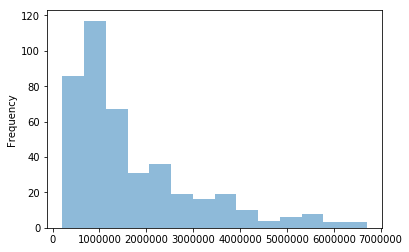

In [61]:
ax = df.loc[df['Raised'] <= 7000000]['Raised'].plot.hist(bins=14, alpha=0.5)
ax

In [66]:
df["Bin"] = ""
df.index = list(range(1, 436))
for index, row in df.iterrows():
    if row['Raised'] < 500000:
        df.at[index, 'Bin'] = '<$500,000'
    elif row['Raised'] < 1000000:
        df.at[index, 'Bin'] = '<$1,000,000'
    elif row['Raised'] < 1500000:
        df.at[index, 'Bin'] = '<$1,500,000'
    elif row['Raised'] < 2000000:
        df.at[index, 'Bin'] = '<$2,000,000'
    elif row['Raised'] < 2500000:
        df.at[index, 'Bin'] = '<$2,500,000'
    elif row['Raised'] < 3000000:
        df.at[index, 'Bin'] = '<$3,000,000'
    elif row['Raised'] < 3500000:
        df.at[index, 'Bin'] = '<$3,500,000'
    elif row['Raised'] < 4000000:
        df.at[index, 'Bin'] = '<$4,000,000'
    elif row['Raised'] < 4500000:
        df.at[index, 'Bin'] = '<$4,500,000'
    elif row['Raised'] < 5000000:
        df.at[index, 'Bin'] = '<$5,000,000'
    elif row['Raised'] < 5500000:
        df.at[index, 'Bin'] = '<$5,500,000'
    elif row['Raised'] < 6000000:
        df.at[index, 'Bin'] = '<$6,000,000'
    elif row['Raised'] < 6500000:
        df.at[index, 'Bin'] = '<$6,500,000'
    elif row['Raised'] < 7000000:
        df.at[index, 'Bin'] = '<$7,000,000'
    else:
        df.at[index, 'Bin'] = '>$7,000,000'
df.head(10)

,District,Raised,At-Large,Bin
1,AL01,2478634.0,0.0,"<$2,500,000"
2,AL02,2410397.0,0.0,"<$2,500,000"
3,AL03,814261.0,0.0,"<$1,000,000"
4,AL04,755666.0,0.0,"<$1,000,000"
5,AL05,346456.0,0.0,"<$500,000"
6,AL06,671829.0,0.0,"<$1,000,000"
7,AL07,1395268.0,0.0,"<$1,500,000"
8,AK01,2322104.0,1.0,"<$2,500,000"
9,AZ01,2340403.0,0.0,"<$2,500,000"
10,AZ02,1864776.0,0.0,"<$2,000,000"


In [69]:
for index, row in df.iterrows():
    if row['At-Large'] == 1.0:
        df.at[index, 'District'] = row['District'][0:2] + "AL"
df.head(10)

,District,Raised,At-Large,Bin
1,AL01,2478634.0,0.0,"<$2,500,000"
2,AL02,2410397.0,0.0,"<$2,500,000"
3,AL03,814261.0,0.0,"<$1,000,000"
4,AL04,755666.0,0.0,"<$1,000,000"
5,AL05,346456.0,0.0,"<$500,000"
6,AL06,671829.0,0.0,"<$1,000,000"
7,AL07,1395268.0,0.0,"<$1,500,000"
8,AKAL,2322104.0,1.0,"<$2,500,000"
9,AZ01,2340403.0,0.0,"<$2,500,000"
10,AZ02,1864776.0,0.0,"<$2,000,000"


In [71]:
colors = {1: "#ffffff", 2: "#efefef", 3:"#dfdfdf", 4:"#cfcfcf", 5: "#bfbfbf", 
          6:"#afafaf", 7: "#9f9f9f", 8: "#8f8f8f", 9: "#7f7f7f", 10: "#6f6f6f", 
          11: "#5f5f5f", 12: "#4f4f4f", 13: "#3f3f3f", 14: "#2f2f2f", 15: "#1f1f1f"}
bins = {1: "<$500,000", 2: "<$1,000,000", 3:"<$1,500,000", 4:"<$2,000,000", 5: "<$2,500,000", 
          6:"<$3,000,000", 7: "<$3,500,000", 8: "<$4,000,000", 9: "<$4,500,000", 10: "<$5,000,000", 
          11: "<$5,500,000", 12: "<$6,000,000", 13: "<$6,500,000", 14: "<$7,000,000", 15: ">$7,000,000"}

In [75]:
data = {}
groups = {}
for bin in range(1, 16):
    group = {}
    group["div"] = "#box{}".format(bin-1)
    group["label"] = bins[bin]
    group["paths"] = list(df.loc[df['Bin'] == bins[bin]]['District'])
    groups[colors[bin]] = group
data["groups"] = groups
data["title"] = "Total Fundraising for a District"
data["hidden"] = []
data["background"] = "#0000ff"
data["borders"] = "#000000"
print(data)

{'groups': {'#ffffff': {'div': '#box0', 'label': '<$500,000', 'paths': ['AL05', 'AZ03', 'CA11', 'CA32', 'CA35', 'CA47', 'CA51', 'CO04', 'CO05', 'FL02', 'FL05', 'FL11', 'FL17', 'FL20', 'FL24', 'GA04', 'GA10', 'HI01', 'ID01', 'IL01', 'IL07', 'IL15', 'IN04', 'KY01', 'KY03', 'KY05', 'LA03', 'LA05', 'ME01', 'MD03', 'MA09', 'NV01', 'NJ08', 'NJ10', 'NJ12', 'NC12', 'OH11', 'TN04', 'TN09', 'TX09', 'TX20', 'TX29', 'TX30', 'VA03', 'VA04', 'VA06']}, '#efefef': {'div': '#box1', 'label': '<$1,000,000', 'paths': ['AL03', 'AL04', 'AL06', 'AZ04', 'AZ05', 'AR01', 'AR03', 'AR04', 'CA02', 'CA03', 'CA06', 'CA09', 'CA14', 'CA27', 'CA29', 'CA30', 'CA34', 'CA38', 'CA40', 'CA41', 'CA44', 'CA46', 'CO01', 'CO02', 'CO07', 'CT01', 'CT02', 'CT04', 'DEAL', 'FL04', 'FL08', 'FL09', 'FL10', 'FL12', 'FL14', 'GA02', 'GA08', 'GA09', 'GA11', 'GA12', 'GA13', 'HI02', 'ID02', 'IL04', 'IL05', 'IN07', 'IN08', 'IN09', 'KY02', 'LA02', 'LA04', 'LA06', 'MD02', 'MD04', 'MA02', 'MI04', 'MI09', 'MI14', 'MN04', 'MS01', 'MS02', 'MS03', 

In [ ]:
#NOTE: You need to replace the single quotes with double quotes for it to work with map chart